# Read in json file and do initial data exploration

In [1]:
# Import  packages
import pandas as pd
import numpy as np

In [2]:
# Load json file into pandas dataframe (DF)
df_logins = pd.read_json('logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
# Inspect DF

print('Describe')
print(df_logins.describe()) #describe
print(' ')
print('Shape:',df_logins.shape)  #shape
print(' ')
print('Info:')
print(df_logins.info())

Describe
                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38
 
Shape: (93142, 1)
 
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


# Part One

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles.  If there are data quality issues, please report them.

In [7]:
# Setting the index to be 'login_time'
df_logins_indx = df_logins.set_index(['login_time'])
df_logins_indx.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [8]:
df_logins_indx.tail()

""
login_time
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02
1970-04-13 18:57:38
1970-04-13 18:54:23


In [9]:
# 15-minute interval
df_logins_indx['count'] = 1
df_logins_indx_15T = df_logins_indx.resample('15T').count()
df_logins_indx_15T = df_logins_indx_15T.reset_index()
print(df_logins_indx_15T.head(10))
print(df_logins_indx_15T.tail(10))

           login_time  count
0 1970-01-01 20:00:00      2
1 1970-01-01 20:15:00      6
2 1970-01-01 20:30:00      9
3 1970-01-01 20:45:00      7
4 1970-01-01 21:00:00      1
5 1970-01-01 21:15:00      4
6 1970-01-01 21:30:00      0
7 1970-01-01 21:45:00      4
8 1970-01-01 22:00:00      9
9 1970-01-01 22:15:00      8
              login_time  count
9778 1970-04-13 16:30:00      4
9779 1970-04-13 16:45:00      3
9780 1970-04-13 17:00:00      5
9781 1970-04-13 17:15:00      3
9782 1970-04-13 17:30:00      9
9783 1970-04-13 17:45:00      5
9784 1970-04-13 18:00:00      5
9785 1970-04-13 18:15:00      2
9786 1970-04-13 18:30:00      7
9787 1970-04-13 18:45:00      6


In [ ]:
# Lets look at the data visually

In [10]:
# import packages
import matplotlib.pyplot as plt
%matplotlib inline

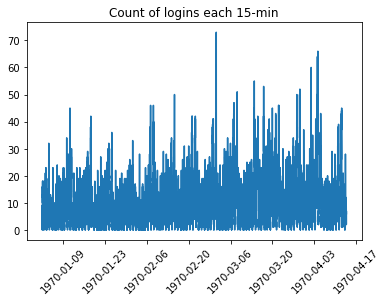

In [11]:
# 
x = df_logins_indx_15T['login_time']
y = df_logins_indx_15T['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min')
plt.xticks(rotation=45);

In [ ]:
# April data is not complete

In [13]:
# Counting per week day
df_logins_indx_15T['weekday'] = df_logins_indx_15T['login_time'].dt.dayofweek
wkday = df_logins_indx_15T.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count['weekday'] = ['Mon', 'Tues', 'Wed','Thurs',
                          'Fri', 'Sat', 'Sun']
wkday_count = wkday_count[['weekday', 'count']]
print(wkday_count)

  weekday  count
0     Mon   8823
1    Tues   9268
2     Wed  10339
3   Thurs  11960
4     Fri  15208
5     Sat  19377
6     Sun  18167


Text(0.5,1,'Count of logins by Weekday')

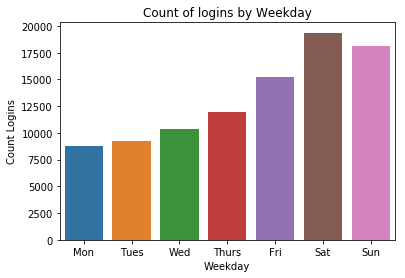

In [14]:
# Visualizing count of logins by weekday
import seaborn as sns
sns.barplot(x='weekday', y='count', data=wkday_count)
plt.ylabel('Count Logins')
plt.xlabel('Weekday')
plt.title('Count of logins by Weekday')

In [ ]:
# More acitivity as it gets closer to the weekend. It peaks on Saturday with a slight drop off on Sunday and major drop off on Monday

In [16]:
# Visualizing count of logins per hour of the day
# Splitting into hours
df_logins_indx_15T['hour'] = df_logins_indx_15T['login_time'].dt.hour
hours = df_logins_indx_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()

Text(0.5,1,'Average count of logins per Hour ')

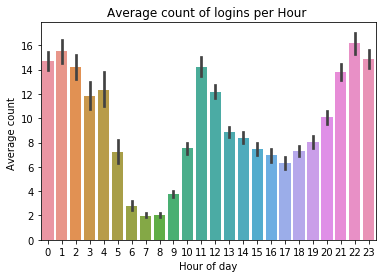

In [17]:
# Plot
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count ')
plt.xlabel('Hour of day')
plt.title('Average count of logins per Hour ')

In [ ]:
# Peak times 8:00pm - 4:00am and 11:0am - 12:00pm

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

In [20]:
# EDA
# Inspect DF

print('Describe')
print(df_udc.describe()) #describe
print(' ')
print('Shape:',df_udc.shape)  #shape
print(' ')
print('Info:')
print(df_udc.info())

Describe
           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000  

In [22]:
df_udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [ ]:
# data cleanup and data organization

In [23]:
# Convert  to dates
df_udc['last_trip_date'] = pd.to_datetime(df_udc['last_trip_date'])
df_udc['signup_date'] = pd.to_datetime(df_udc['signup_date'])

In [24]:
# Impute in missing values
df_udc['avg_rating_by_driver'].fillna(df_udc['avg_rating_by_driver'].mean(), inplace=True)
df_udc['avg_rating_of_driver'].fillna(df_udc['avg_rating_of_driver'].mean(), inplace=True)
df_udc['phone'].fillna('iPhone', inplace=True)

In [27]:
import datetime
last_day = max(df_udc['last_trip_date'])
days = [last_day - datetime.timedelta(days=x) for x in range(0, 30)]
df_udc['retained_user'] = df_udc['last_trip_date'].map(lambda x: int(x in days))

In [29]:
active_df = df_udc[df_udc['retained_user'] == 1]
non_active_df = df_udc[df_udc['retained_user'] == 0]
percent_active = len(active_df) / len(df_udc)
print('Percentage of Retained users: {0}'.format(percent_active))

Percentage of Retained users: 0.3662


In [30]:
df_udc['active_user'] = ((df_udc['last_trip_date'] - df_udc['signup_date']) / np.timedelta64(1, 'M')).\
        map(lambda x: 'active' if x > 5 else 'inactive')

Text(0.5,1,'Active Users by City')

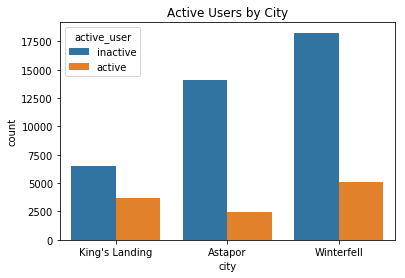

In [32]:
# Plot
sns.countplot(x='city', hue='active_user', data=df_udc)
plt.title('Active Users by City')

Text(0.5,1,'Comparison of Average Surge by City')

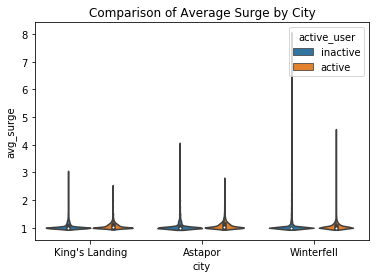

In [37]:
sns.violinplot(x="city", y="avg_surge", hue='active_user', data=df_udc)
plt.title('Comparison of Average Surge by City')

Text(0.5,1,'Trips in First 30 Days')

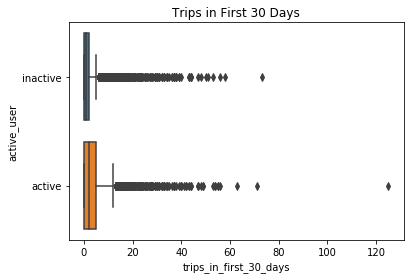

In [38]:
sns.boxplot(x='trips_in_first_30_days', y='active_user', data=df_udc)
plt.title('Trips in First 30 Days')

In [33]:
df_udc.phone.value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [34]:
df_udc.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

# Exploratory Insights

36% of the observed users were retained
Most users appear to be in the Winterfell area
Surge is more prevalent in Winterfell
Active users are more likely to have a trip within their first 30 days of signing up

# Part 3 ‑ Predictive modeling
"""
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider 
"""

In [ ]:
# Feature Engineering
"""
The goal is now to predict whether or not a user will be active in their 6th month. 
First we will drop repetitive columns and columns that don't have much value for prediction. 
These columns are the last trip date, signup date, surge percentage, phone, and ultimate 
black status. I also combined the average rating by driver and average rating of driver into 
one column by taking the average of the two.

It appears that our features seem to have mostly skewed distributions, scaling will most likely 
be necessary for our modeling process.

Looking at a correlation analysis of our features, it appears that there is not a strong correlation 
between any two features.
""""

In [42]:
df_predict = df_udc.drop(['last_trip_date', 'phone', 'signup_date', 'surge_pct', 'ultimate_black_user', 'retained_user'], axis=1)
city_dict = {"King's Landing": 1, 'Astapor': 2, 'Winterfell': 3}
active_user_dict = {'inactive': 0, 'active': 1}
df_predict['city'] = df_udc['city'].replace(city_dict)
df_predict['active_user'] = df_udc['active_user'].replace(active_user_dict)
df_predict['combined_avg_driver_rating'] = df_udc[['avg_rating_by_driver', 'avg_rating_of_driver']].mean(axis=1)
df_predict = df_predict.drop(['avg_rating_by_driver', 'avg_rating_of_driver'], axis=1)
cols = list(df_predict.columns.values)
feature_cols = [col for col in cols if col != 'active_user']
df_predict = df_predict[feature_cols]
df_predict.head()

,avg_dist,avg_surge,city,trips_in_first_30_days,weekday_pct,combined_avg_driver_rating
0,3.67,1.10,1,4,46.2,4.85
1,8.26,1.00,2,0,50.0,5.00
2,0.77,1.00,2,3,100.0,4.65
3,2.36,1.14,1,9,80.0,4.75
4,3.13,1.19,3,14,82.4,4.65


In [43]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
avg_dist                      50000 non-null float64
avg_surge                     50000 non-null float64
city                          50000 non-null int64
trips_in_first_30_days        50000 non-null int64
weekday_pct                   50000 non-null float64
combined_avg_driver_rating    50000 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB


In [44]:
df_predict['combined_avg_driver_rating'] = df_predict['combined_avg_driver_rating'].fillna(df_predict['combined_avg_driver_rating'].mean())

In [45]:
df_predict.describe()

,avg_dist,avg_surge,city,trips_in_first_30_days,weekday_pct,combined_avg_driver_rating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,1.074764,2.264120,2.278200,60.926084,4.689859
std,5.707357,0.222336,0.774321,3.792684,37.081503,0.377193
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.420000,1.000000,2.000000,0.000000,33.300000,4.500000
50%,3.880000,1.000000,2.000000,1.000000,66.700000,4.800780
75%,6.940000,1.050000,3.000000,3.000000,100.000000,5.000000
max,160.960000,8.000000,3.000000,125.000000,100.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280478656A0>,
      dtype=object)

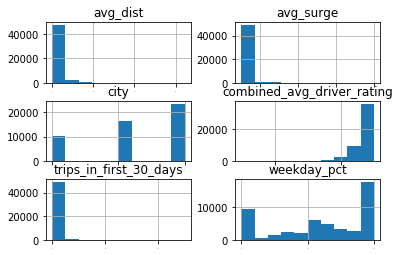

In [47]:
df_predict.hist(sharex=False, sharey=False, xlabelsize=1)

In [48]:
df_predict.corr()

,avg_dist,avg_surge,city,trips_in_first_30_days,weekday_pct,combined_avg_driver_rating
avg_dist,1.000000,-0.081491,0.011120,-0.136329,0.101652,0.068498
avg_surge,-0.081491,1.000000,-0.013036,-0.001841,-0.110071,-0.010013
city,0.011120,-0.013036,1.000000,0.011517,-0.026142,-0.140941
trips_in_first_30_days,-0.136329,-0.001841,0.011517,1.000000,0.050388,-0.031385
weekday_pct,0.101652,-0.110071,-0.026142,0.050388,1.000000,0.021460
combined_avg_driver_rating,0.068498,-0.010013,-0.140941,-0.031385,0.021460,1.000000


In [49]:
df_predict['active_user'] = df_udc['active_user'].replace(active_user_dict)
df_predict['active_user'].value_counts()

0    38806
1    11194
Name: active_user, dtype: int64

# Modelling
Will try a few different model:
    LogisticRegression
    DecisionTreeClassifier
    KNeighborsClassifier
    RandomForestClassifier
    GradientBoostingClassifier

In [50]:
# import packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [66]:
# Define ml_model_1:
# takes in model Instantiate model (model)
# fits, predicts, and evaluates (prints results)
def ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test):
    print('Running ', modelnm)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluate
    print(modelnm,' score: ',model.score(X_test, y_test))
    print(' ')
    # Compute and print the confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [53]:
# split out into train and test

array = df_predict.values

X = array[:,0:6].astype(float)
y = array[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [72]:
# Logistic Regression
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr_pred = ml_model_1(lr, 'LogisticRegression', X_train, X_test, y_train, y_test)

Running  LogisticRegression
LogisticRegression  score:  0.7835
 
[[7702  107]
 [2058  133]]
             precision    recall  f1-score   support

        0.0       0.79      0.99      0.88      7809
        1.0       0.55      0.06      0.11      2191

avg / total       0.74      0.78      0.71     10000



In [73]:
# DecisionTreeClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
# from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_pred = ml_model_1(dtc, 'DecisionTreeClassifier', X_train, X_test, y_train, y_test)

Running  DecisionTreeClassifier
DecisionTreeClassifier  score:  0.7322
 
[[6458 1351]
 [1327  864]]
             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83      7809
        1.0       0.39      0.39      0.39      2191

avg / total       0.73      0.73      0.73     10000



In [74]:
# KNeighborsClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = ml_model_1(knn, 'KNeighborsClassifier', X_train, X_test, y_train, y_test)

Running  KNeighborsClassifier
KNeighborsClassifier  score:  0.7617
 
[[6876  933]
 [1450  741]]
             precision    recall  f1-score   support

        0.0       0.83      0.88      0.85      7809
        1.0       0.44      0.34      0.38      2191

avg / total       0.74      0.76      0.75     10000



In [75]:
# RandomForestClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_pred = ml_model_1(rf, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

Running  RandomForestClassifier
RandomForestClassifier  score:  0.7648
 
[[6904  905]
 [1447  744]]
             precision    recall  f1-score   support

        0.0       0.83      0.88      0.85      7809
        1.0       0.45      0.34      0.39      2191

avg / total       0.74      0.76      0.75     10000



In [84]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=7)
gbc_pred = ml_model_1(gbc, 'GradientBoostingClassifier', X_train, X_test, y_train, y_test)

Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.8013
 
[[7381  428]
 [1559  632]]
             precision    recall  f1-score   support

        0.0       0.83      0.95      0.88      7809
        1.0       0.60      0.29      0.39      2191

avg / total       0.78      0.80      0.77     10000



In [ ]:
# top performing algorithm 
GradientBoostingClassifier  score:  0.8013

Text(0.5,1,'ROC Curve')

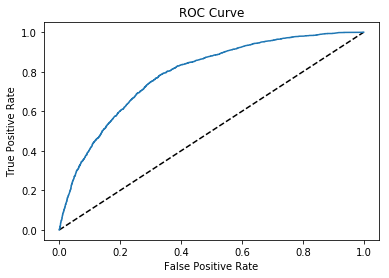

In [85]:
from sklearn.metrics import roc_curve

# Fit the classifier to the training data
gbc.fit(X_train,y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(gbc, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7890503818371517
AUC scores computed using 5-fold cross-validation: [0.79418944 0.78635171 0.79366111 0.79212872 0.79670324]


In [90]:
# Lets see if we can increase performance of model

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

scoring='roc_auc'
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=250,min_samples_leaf=50,
                                   max_depth=5,max_features='sqrt',subsample=0.8,random_state=10)

param_test1 = {'n_estimators':range(20,81,10)}

kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_test1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.794606 using {'n_estimators': 80}
0.786379 (0.009060) with: {'n_estimators': 20}
0.789143 (0.008957) with: {'n_estimators': 30}
0.790726 (0.008660) with: {'n_estimators': 40}
0.792315 (0.008591) with: {'n_estimators': 50}
0.793110 (0.008725) with: {'n_estimators': 60}
0.794083 (0.008703) with: {'n_estimators': 70}
0.794606 (0.008604) with: {'n_estimators': 80}


In [92]:
# Further Performance Evaluation

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators= 80, max_depth=7, min_samples_split=1000, learning_rate=0.1,
                                  min_samples_leaf=50,
                                  max_features='sqrt',subsample=0.8,random_state=10)
model.fit(rescaledX, y_train)

# estimate accuracy on test set

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[7334  475]
 [1530  661]]
             precision    recall  f1-score   support

        0.0       0.83      0.94      0.88      7809
        1.0       0.58      0.30      0.40      2191

avg / total       0.77      0.80      0.77     10000



Text(0.5,1,'Feature Importance')

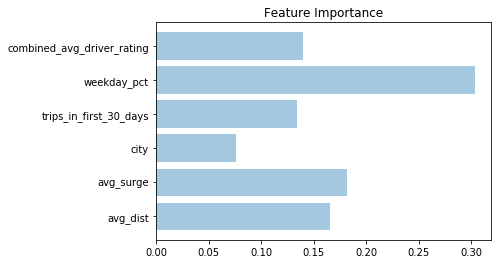

In [93]:
#  most important features for prediction using the feature importances attribute of the GBM.
y_pos = np.arange(len(feature_cols))

plt.barh(y_pos, model.feature_importances_, align='center', alpha=0.4)
plt.yticks(y_pos, feature_cols)
plt.title('Feature Importance')

# Conclusion 



Tried different models.  GradientBoosting provide best results when looking at accurracy (80%).  One way to improve the accuracy could be to normalize the features to minimize any bias from different scales. 

Week day pct is the most important feature 

With this model Ultimate is able to predicting non-active users very well, while having more difficulty predicting active users

It appears that the percentage used on weekdays is the most important feature, using that knowledge Ultimate can look for ways to get users to drive specifically during the week to prolong activity

Active users were more likely to have a trip in their first 30 days, knowing this Ultimate could look for way to incentive users early on after their signup date

There are clear market opportunities in King's Landing especially as most of the dataset did not contain users from King's Landing

The key is being able to integrate the service into their daily lives, by focusing on their use within their first 30 days of signing up as well as usage during the week, longterm user retention can be retained